In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dalle-recognition-dataset/train.csv
/kaggle/input/dalle-recognition-dataset/test.csv
/kaggle/input/dalle-recognition-dataset/test/fake/2193.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/2081.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1501.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/2278.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1711.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/239.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/792.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1173.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/150.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1650.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1167.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/516.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1154.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/1395.jpg
/kaggle/input/dalle-recognition-dataset/test/fake/915.jpg
/kaggle/input/dalle-r

In [3]:
import tensorflow as tf

2024-04-17 06:33:25.292091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 06:33:25.292188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 06:33:25.448733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [37]:

import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = "/kaggle/input/dalle-recognition-dataset/train"


In [53]:
data_dir2 = "/kaggle/input/dalle-recognition-dataset/test"

In [52]:

print(data_dir)

/kaggle/input/dalle-recognition-dataset/train


In [54]:
print(data_dir2)

/kaggle/input/dalle-recognition-dataset/test


In [38]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5083 files belonging to 2 classes.
Using 4067 files for training.


In [39]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5083 files belonging to 2 classes.
Using 1016 files for validation.


In [83]:
img_height,img_width=224,224
batch_size=32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 2 classes.


In [40]:

class_names = train_ds.class_names
print(class_names)

['fake', 'real']


In [84]:
class_names = test_ds.class_names
print(class_names)

['fake', 'real']


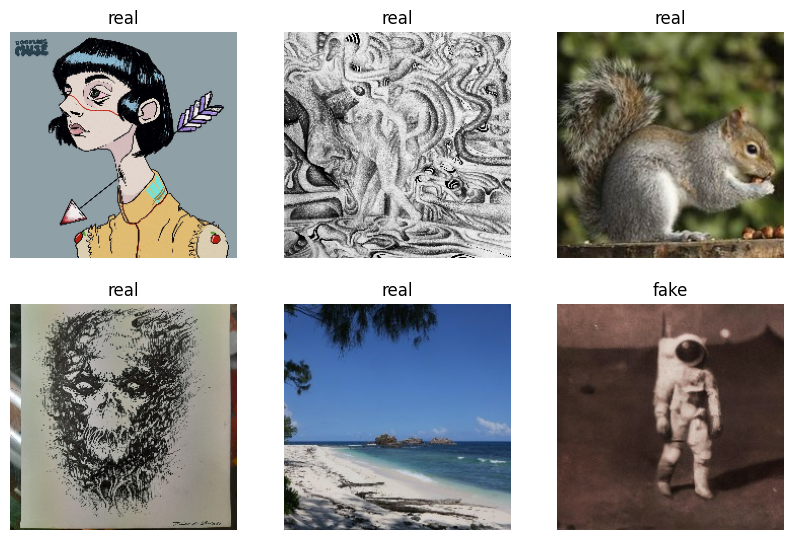

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

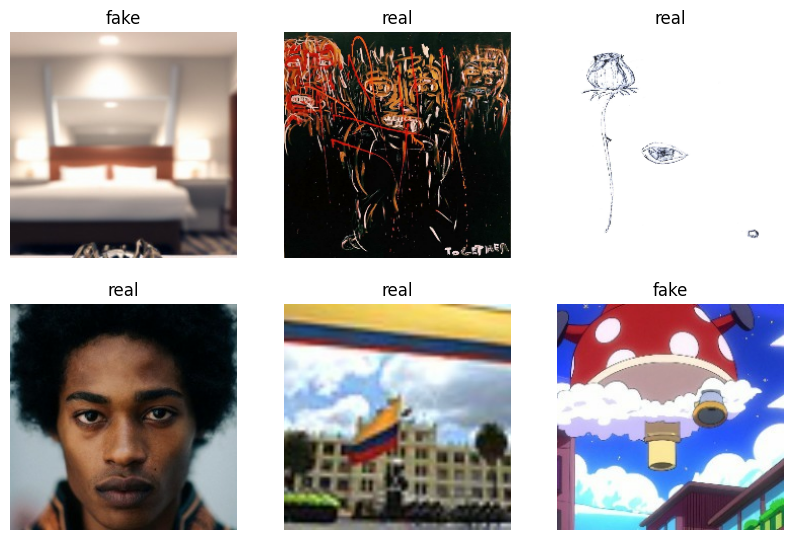

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [95]:
model = Sequential()

resnet=tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation=None
)
for layer in resnet.layers:
        layer.trainable=False
model.add(resnet)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [96]:
import numpy as np
dummy_input = np.random.rand(1, 224, 224, 3)
_ = model(dummy_input)
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (1, 1000)              │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (1, 1000)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (1, 256)               │       256,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (1, 2)                 │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,893,482 (98.78 MB)

 Trainable params: 256,770 (1003.01 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [89]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (1, 1000)              │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (1, 1000)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 512)               │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (1, 256)               │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (1, 2)                 │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,281,066 (100.25 MB)

 Trainable params: 644,354 (2.46 MB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [99]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [91]:
unique_labels = set(class_names)
print(unique_labels)

{'fake', 'real'}


In [100]:

epochs=5
history = model.fit(
  train_ds,
  batch_size = 32,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
  1/128 ━━━━━━━━━━━━━━━━━━━━ 26:19 12s/step - accuracy: 0.3750 - loss: 2.3116

W0000 00:00:1713338787.141682      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.7221 - loss: 1.0983

W0000 00:00:1713338815.559970      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713338821.773769      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


128/128 ━━━━━━━━━━━━━━━━━━━━ 55s 338ms/step - accuracy: 0.7226 - loss: 1.0949 - val_accuracy: 0.8061 - val_loss: 0.4626
Epoch 2/5


W0000 00:00:1713338830.069172      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 281ms/step - accuracy: 0.8454 - loss: 0.3549 - val_accuracy: 0.8573 - val_loss: 0.3573
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 37s 277ms/step - accuracy: 0.9065 - loss: 0.2224 - val_accuracy: 0.8740 - val_loss: 0.3366
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 37s 277ms/step - accuracy: 0.9254 - loss: 0.1790 - val_accuracy: 0.8642 - val_loss: 0.3834
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 280ms/step - accuracy: 0.9604 - loss: 0.1152 - val_accuracy: 0.8740 - val_loss: 0.3477


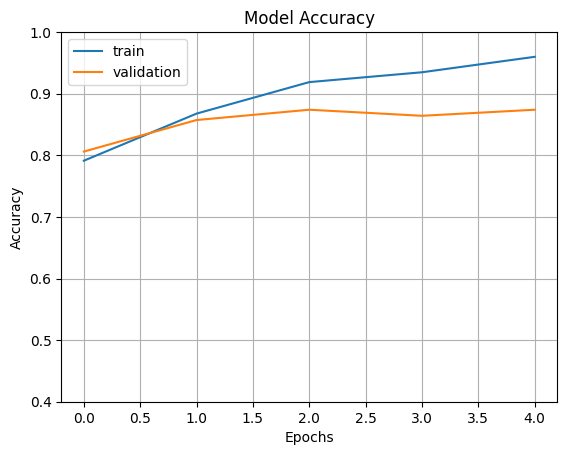

In [101]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

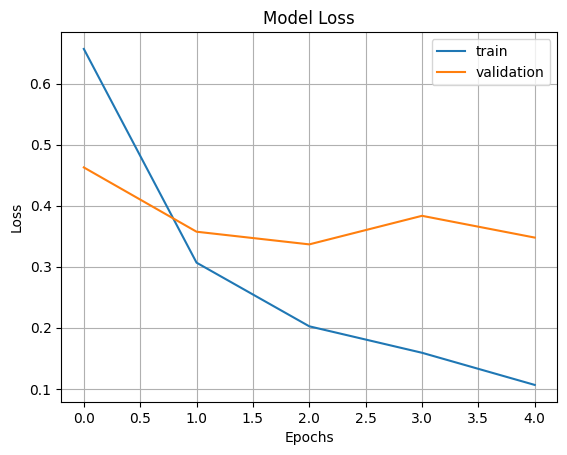

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [106]:
import cv2
image=cv2.imread("/kaggle/input/dalle-recognition-dataset/test/fake/1012.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [107]:
pred=model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[9.9997759e-01 2.2387456e-05]]


In [108]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is fake


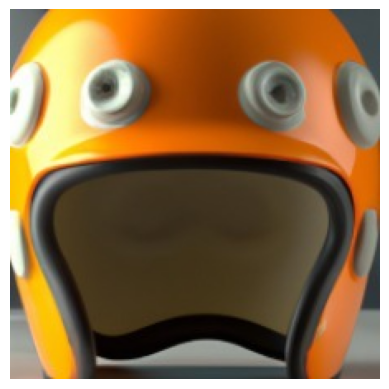

In [109]:
img = plt.imread('/kaggle/input/dalle-recognition-dataset/test/fake/1012.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [110]:
total_examples = 0
correct_predictions = 0
for images, labels in test_ds:
    predictions = model.predict(images)
    labels = tf.cast(labels, tf.int64)
    total_examples += labels.shape[0]
    
    correct_predictions += tf.reduce_sum(tf.cast(tf.argmax(predictions, axis=1) == labels, tf.int64))

accuracy = correct_predictions / total_examples

print('Test Accuracy:', accuracy.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


W0000 00:00:1713339113.283197      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

W0000 00:00:1713339125.120716      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
